## MEAN / MEDIAN IMPUTATION

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset** that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

<br>

__Dtype__:
- Numerical variables.

__Assumptions__:
- Missing values completely at random (MCAR).
- The missing observations, most likely look like the majority of the observations in the variable.
- No more than 5% of the total dataset contains missing data.
- a) data is distributed skewed - median; b) data is distributed normally - mean.

__Limitations__:
- Distortion of the original variable distribution.
- Distortion of the original variance.
- Distortion of the covariance with the remaining variables of the dataset.

__Datasets__:
- House Prices dataset.
- Titanic dataset.

<br>

### Content:

__I. Titanic Dataset__:
1. Loading Data and Basic Data Exploration
2. Imputation
    - Train/Test splitting.
    - Identifying missing values and median/mean. Adding median/mean columns.
    - Detection of changes before and after the imputation.
    
__II. House Prices Dataset Dataset__:
1. Loading Data and Basic Data Exploration
2. Imputation
    - Train/Test splitting.
    - Identifying missing values and median/mean. Adding median/mean columns.
    - Detection of changes before and after the imputation.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# I. Titanic

## 1. Loading Data and Basic Data Exploration

In [2]:
data = pd.read_csv('../titanic.csv')
data.shape

(1309, 14)

In [3]:
data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [4]:
# re-load the Titanic Dataset with a fewer variables for analysing
# where missing values are concidered as MCAR
# and where a mean amount of missing values is reasonable 
# for further imputation exploring

# so, re-load only ['age', 'fare', 'survived']

data = pd.read_csv('../titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()
# 'fare' is loaded for further imputation exploring 

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [5]:
# the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

The only variable with missing data is Age, with ~20% of missing observations.

## 2. Imputation

### - Train/Test splitting

Imputation should be done over the training set, and then propagated to the test set.

In [6]:
# train_test_split
# ['age', 'fare']: age a 

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']], 
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

### - Identifying missing values and median/mean. Adding median/mean columns

In [7]:
# explore the missing data in the train set
# the percentages should be fairly similar to those of the whole dataset

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [8]:
# calculate the median and mean of Age

median = X_train.age.median()
mean = X_train.age.mean()
print(f"the meadin of Age: {median}\nthe mean of Age: {mean}")

the meadin of Age: 28.0
the mean of Age: 30.23144399460189


In [9]:
# the mean contains many decimals, so gonna round to 1
mean = np.round(X_train.age.mean(), 1)
print(f"the meadin of Age: {median}\nthe mean of Age: {mean}")

the meadin of Age: 28.0
the mean of Age: 30.2


In [10]:
# a function to fill missing values with the mean/median:

def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [11]:
# create new columns with the missing values replaced:

# first replace with the median
X_train['Age_median'] = impute_na(X_train, 'age', median)

# now replace with the mean
X_train['Age_mean'] = impute_na(X_train, 'age', mean)

X_train.head(20)

,age,fare,Age_median,Age_mean
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,28.0,30.2
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,28.0,30.2
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


### - Detection of changes before and after the imputation.

__A) a change in the distribution:__

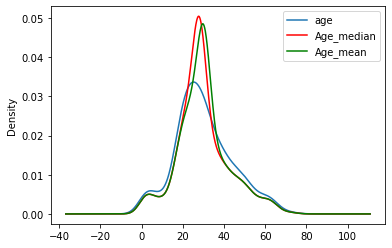

In [12]:
# expected that the distribution has changed 
# with now more values accumulating towards the median or median

# plot distribution

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

__B) a change in the variance:__

In [13]:
# expected a change in the variance after mean / median imputation

print('Original variable variance: ', X_train['age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  194.16304666581854
Variance after median imputation:  157.7984295760209
Variance after mean imputation:  157.02819071377823


As expected, the variance is underestimated, because now many values are the same, either the mean or the median value.

__C) a change in the covariance:__

In [14]:
# mean / median imputation may affect the relationship 
# with the other variables in the dataset

X_train[['fare', 'age', 'Age_median', 'Age_mean']].cov()

,fare,age,Age_median,Age_mean
fare,2248.326729,136.176223,114.961682,110.199652
age,136.176223,194.163047,194.163047,194.163047
Age_median,114.961682,194.163047,157.798430,157.038894
Age_mean,110.199652,194.163047,157.038894,157.028191


We see indeed that the covariance between Age and Fare is changed after the mean / median imputation.

__D) a change in the outlier amount:__

<AxesSubplot:>

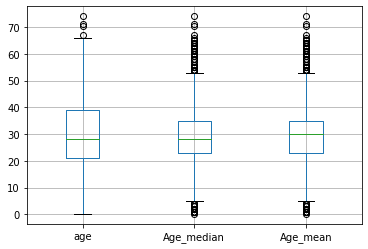

In [15]:
# Finally, mean / median imputation may lead 
# to observations that are normal, to look like outliers

# find out using a boxplot
X_train[['age', 'Age_median', 'Age_mean']].boxplot()

After the imputation not only, there are more outliers on the higher Age values, but we have now outliers as well for the lower values of Age.


# II. House Prices Dataset

## 1. Loading Data and Basic Data Exploration

In [16]:
# use only the following variables (the best suitable columns)

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [17]:
# load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [18]:
# print the variables that contain missing data

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [19]:
# find the percentage of missing data within those variables

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

## 2. Imputation

### - Train/Test splitting

In [20]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

### - Identifying missing values and median/mean. Adding median/mean columns.

In [21]:
# create new columns with the missing values replaced
# by the median using the function created earlier:

In [22]:
# for LotFrontage column

median = X_train['LotFrontage'].median()

X_train.loc[:,'LotFrontage_median'] = impute_na(X_train, 'LotFrontage', median)
X_test.loc[:,'LotFrontage_median'] = impute_na(X_test, 'LotFrontage', median)

C:\Users\48796\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\48796\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [23]:
# for MasVnrArea column
median = X_train['MasVnrArea'].median()

X_train.loc[:,'MasVnrArea_median'] = impute_na(X_train, 'MasVnrArea', median)
X_test.loc[:,'MasVnrArea_median'] = impute_na(X_test, 'MasVnrArea', median)

In [24]:
# for GarageYrBlt column
median = X_train['GarageYrBlt'].median()

X_train.loc[:, 'GarageYrBlt_median'] = impute_na(X_train, 'GarageYrBlt', median)
X_test.loc[:,'GarageYrBlt_median'] = impute_na(X_test, 'GarageYrBlt', median)

### - Detection of changes before and after the imputation.

__A) a change in the distribution:__

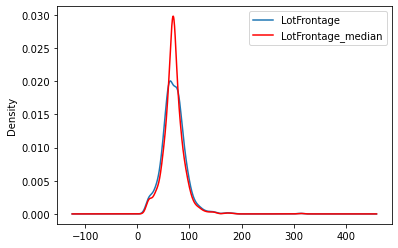

In [25]:
# for LotFrontage: expected that the distribution has changed###
# with now more values accumulating towards the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

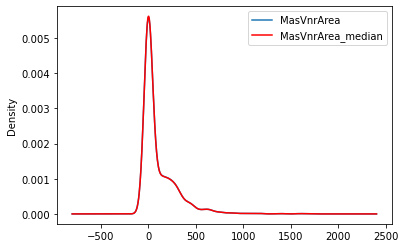

In [26]:
# for MasVnrArea: because the percentage of missing data was low,
# expected no a dramatic change in the original distribution of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

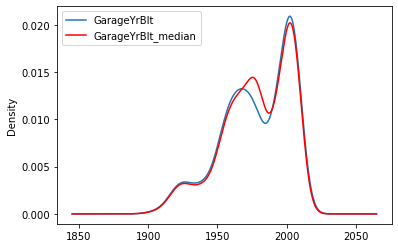

In [27]:
# similarly, for GarageBlt:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['GarageYrBlt'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['GarageYrBlt_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

__B) a change in the variance:__

In [28]:
# explore the effect of the imputation technique on the variance:


# for LotFrontAge: expected a change in the variance after imputation 
# because the percentage of missing data is quite high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original Variance:  532.5872021885676
Variance after median imputation:  434.06604265416564


In [29]:
# for MasnVnrArea: expected a tiny change in the variance after imputation
# because the % of missing data was small

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())

Original Variance:  32983.538710039466
Variance after median imputation:  32874.27007404175


In [30]:
# for GarageYrBlt: expected a tiny change in the variance after imputation
# because the % of missing data was small

print('Original Variance: ', X_train['GarageYrBlt'].var())
print('Variance after median imputation: ', X_train['GarageYrBlt_median'].var())

Original Variance:  624.3059475074134
Variance after median imputation:  591.3356883144767


__C) a change in the covariance:__

In [31]:
# explore the covariance:

# covariance is affected for LotFrontAge
# but not so much for the other 2 variables

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.744233e+02,28.095264
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,5.384774,1.005330e+02,16.875386
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,553.921303,3.298354e+04,1134.380889
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,788.095358,7.472110e+03,1724.141544
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2370.929189,2.465436e+04,2989.473391
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,2750.747094,2.080136e+04,1890.271636
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3189.685753,3.496714e+04,2576.345636
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,24.755173,1.182673e+03,624.305948
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,106.009105,3.212101e+03,627.624634
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,544838.836893,6.790442e+06,877485.418108


__D) a change in the outlier amount:__

<AxesSubplot:>

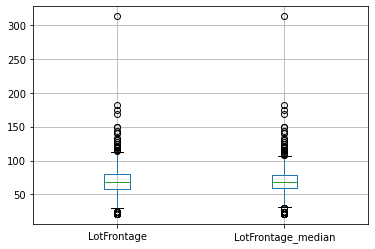

In [32]:
# explore the knock-on effect on outliers:


# for LotFrontAge: there is a decrease in the outlier boundaries
# but not a visible effect for the other 2 variables


X_train[['LotFrontage', 'LotFrontage_median']].boxplot()

<AxesSubplot:>

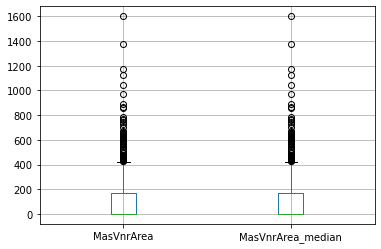

In [33]:
X_train[['MasVnrArea', 'MasVnrArea_median']].boxplot()

<AxesSubplot:>

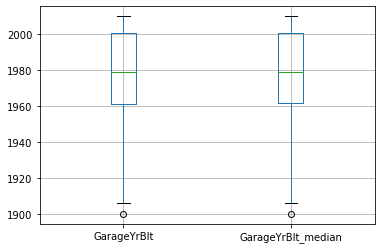

In [34]:
X_train[['GarageYrBlt', 'GarageYrBlt_median']].boxplot()